#### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import training data

In [2]:
train = pd.read_csv(r'train.csv/train.csv')

In [3]:
train

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,130226,2021-02-06 00:00:00,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN,NaN,NaN,369.516667,NaN
449996,2021-02-06 10:03:17,130227,2021-02-06 00:00:00,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN,NaN,NaN,239.133333,NaN
449997,2021-02-06 10:03:18,130228,2021-02-06 00:00:00,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN,NaN,NaN,204.150000,NaN
449998,2021-02-06 10:03:19,130229,2021-02-06 00:00:00,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN,NaN,NaN,65.583333,NaN


In [ ]:
# shape  of the dataset

In [4]:
print(f"Total number of rows: {train.shape[0]}")
print(f"Total number of columns: {train.shape[1]}")

Total number of rows: 450000
Total number of columns: 20


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [6]:
print(f"Columns : \n{train.columns}")

Columns : 
Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'reassignment_method',
       'reassignment_reason', 'reassigned_order', 'session_time',
       'cancelled_time'],
      dtype='object')


In [7]:
train.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


In [152]:
train['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [8]:
train.describe(include="object")

,order_time,order_date,allot_time,accept_time,pickup_time,delivered_time,reassignment_method,reassignment_reason,cancelled_time
count,450000,450000,450000,449843,447579,444782,13744,13753,5218
unique,252868,12,246871,254201,257117,257067,2,3,5176
top,2021-01-30 14:38:36,2021-02-05 00:00:00,2021-01-29 14:18:11,2021-01-27 16:03:12,2021-01-28 15:29:58,2021-01-30 14:38:14,auto,Auto Reassignment basis Inaction. coreengine.t...,2021-01-30 15:52:19
freq,11,42341,13,15,11,12,13383,7212,2


#### Feature Enginnering

#### Missing values

In [9]:
train.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [10]:
train.isnull().mean()

order_time              0.000000
order_id                0.000000
order_date              0.000000
allot_time              0.000000
accept_time             0.000349
pickup_time             0.005380
delivered_time          0.011596
rider_id                0.000000
first_mile_distance     0.000000
last_mile_distance      0.000000
alloted_orders          0.037662
delivered_orders        0.038536
cancelled               0.000000
undelivered_orders      0.038536
lifetime_order_count    0.000118
reassignment_method     0.969458
reassignment_reason     0.969438
reassigned_order        0.969438
session_time            0.008167
cancelled_time          0.988404
dtype: float64

In [12]:
# Drop unwanted columns
train.drop(['reassignment_method','reassignment_reason','reassigned_order','cancelled_time'],axis=1,inplace=True)

In [13]:
train.shape

(450000, 16)

In [14]:
train

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,130226,2021-02-06 00:00:00,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,369.516667
449996,2021-02-06 10:03:17,130227,2021-02-06 00:00:00,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,239.133333
449997,2021-02-06 10:03:18,130228,2021-02-06 00:00:00,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,204.150000
449998,2021-02-06 10:03:19,130229,2021-02-06 00:00:00,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,65.583333


In [15]:
# import datetime module from datetime
from datetime import datetime

In [16]:
train.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'session_time'],
      dtype='object')

In [17]:
train['order_time'] = pd.to_datetime(train['order_time'])
train['order_date'] = pd.to_datetime(train['order_date'])
train['allot_time'] = pd.to_datetime(train['allot_time'])
train['accept_time'] = pd.to_datetime(train['accept_time'])
train['pickup_time'] = pd.to_datetime(train['pickup_time'])
train['delivered_time'] = pd.to_datetime(train['delivered_time'])

In [18]:
train.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000


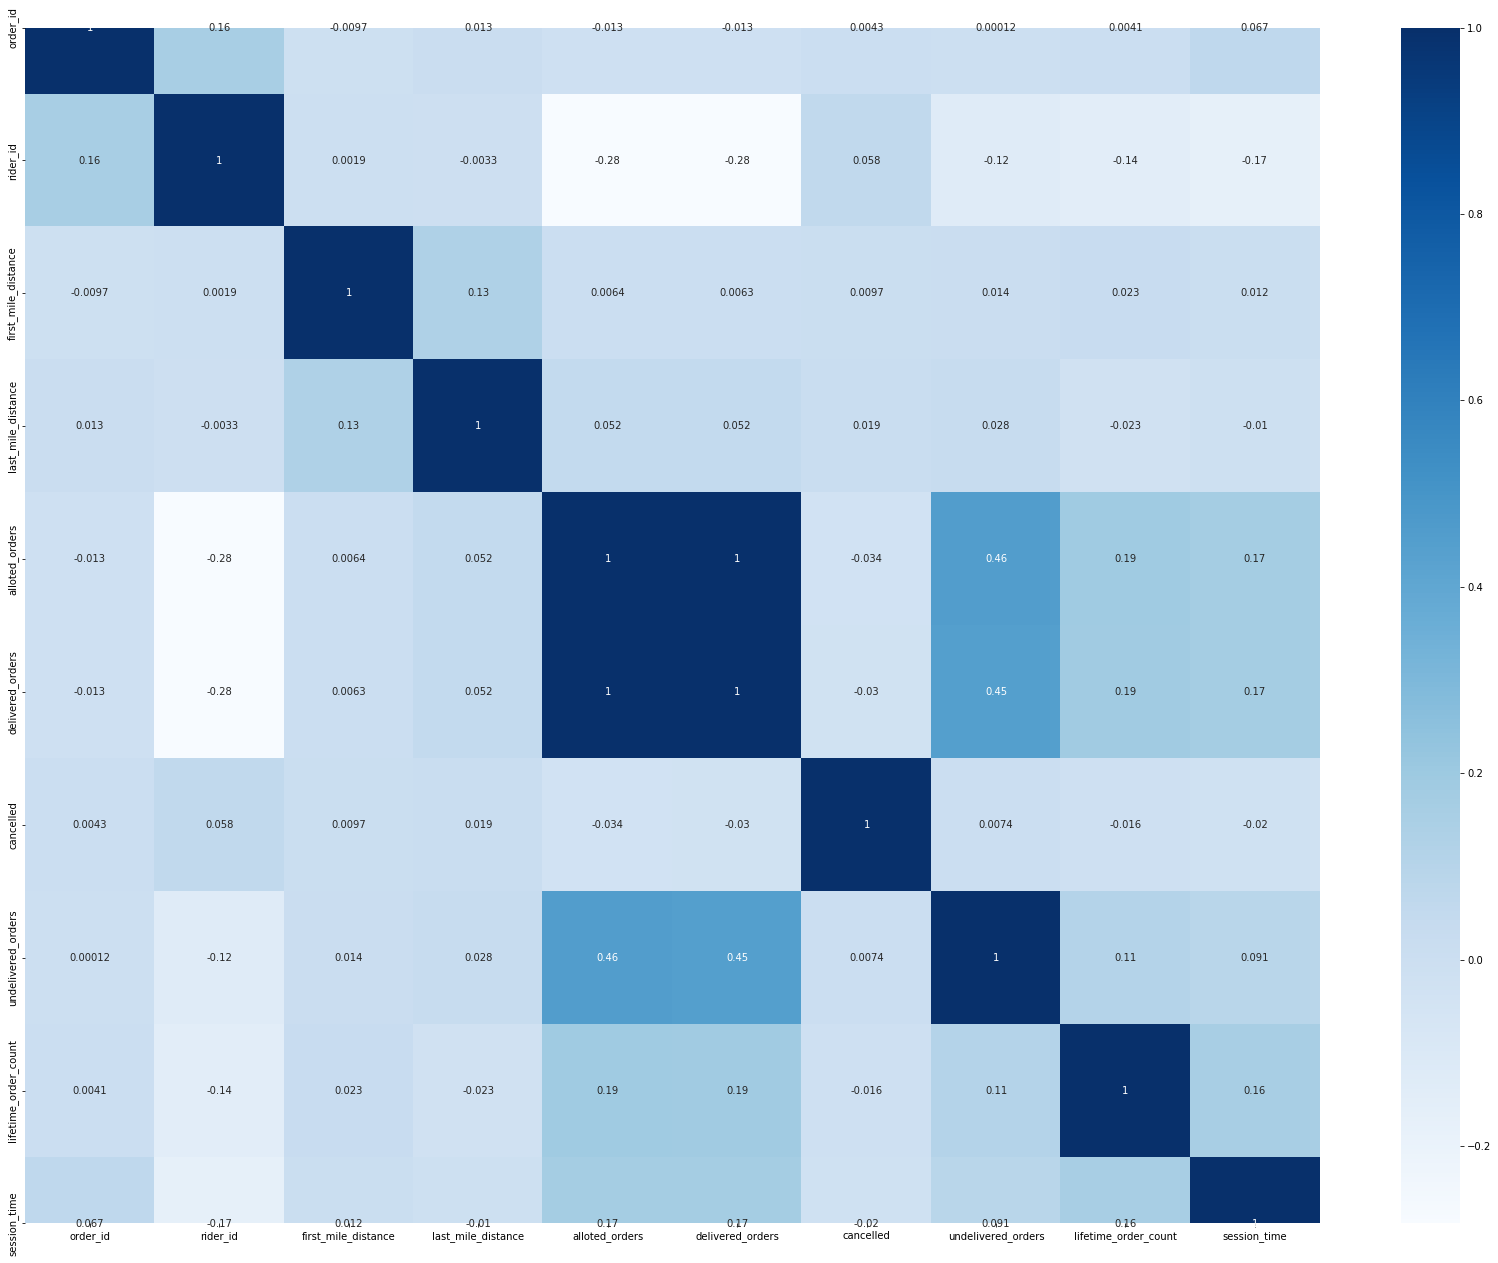

In [19]:
plt.figure(figsize=(29,22)) 
sns.heatmap(train.corr(), cmap='Blues',annot=True)

Order date

In [20]:
train['order year'] = train['order_date'].dt.year
train['order month'] = train['order_date'].dt.month
train['order day'] = train['order_date'].dt.day


train.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,order year,order month,order day
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,2021,1,26
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,2021,1,26
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,2021,1,26
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,2021,1,26
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,2021,1,26


Allot time

In [23]:
train['allot_time hour'] = train['allot_time'].dt.hour
train['allot_time minute'] = train['allot_time'].dt.minute
train['allot_time second'] = train['allot_time'].dt.second

Accept time

In [25]:
train['accept_time hour'] = train['accept_time'].dt.hour
train['accept_time minute'] = train['accept_time'].dt.minute
train['accept_time second'] = train['accept_time'].dt.second

In [26]:
train

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,...,session_time,order year,order month,order day,allot_time hour,allot_time minute,allot_time second,accept_time hour,accept_time minute,accept_time second
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,...,NaN,2021,1,26,2,21,59,2.0,22.0,8.0
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,...,3.266667,2021,1,26,2,33,57,2.0,34.0,45.0
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,...,9.816667,2021,1,26,2,39,57,2.0,40.0,13.0
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,...,17.533333,2021,1,26,2,48,25,2.0,49.0,6.0
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,...,1.350000,2021,1,26,3,7,21,3.0,7.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,130226,2021-02-06,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,...,369.516667,2021,2,6,10,3,44,10.0,4.0,14.0
449996,2021-02-06 10:03:17,130227,2021-02-06,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,...,239.133333,2021,2,6,10,3,18,10.0,4.0,34.0
449997,2021-02-06 10:03:18,130228,2021-02-06,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,...,204.150000,2021,2,6,10,4,6,10.0,4.0,39.0
449998,2021-02-06 10:03:19,130229,2021-02-06,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,...,65.583333,2021,2,6,10,3,19,10.0,5.0,41.0


Order time

In [27]:
train['order_time hour'] = train['order_time'].dt.hour
train['order_time minute'] = train['order_time'].dt.minute
train['order_time seconds'] = train['order_time'].dt.second


train.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,...,order day,allot_time hour,allot_time minute,allot_time second,accept_time hour,accept_time minute,accept_time second,order_time hour,order_time minute,order_time seconds
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,...,26,2,21,59,2.0,22.0,8.0,2,21,35
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,...,26,2,33,57,2.0,34.0,45.0,2,33,16
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,...,26,2,39,57,2.0,40.0,13.0,2,39,49
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,...,26,2,48,25,2.0,49.0,6.0,2,47,53
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,...,26,3,7,21,3.0,7.0,57.0,3,6,30


In [28]:
train.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'session_time',
       'order year', 'order month', 'order day', 'allot_time hour',
       'allot_time minute', 'allot_time second', 'accept_time hour',
       'accept_time minute', 'accept_time second', 'order_time hour',
       'order_time minute', 'order_time seconds'],
      dtype='object')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  datetime64[ns]
 6   delivered_time        444782 non-null  datetime64[ns]
 7   rider_id              450000 non-null  int64         
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [30]:
train.drop(['order_time','order_date','allot_time','accept_time','pickup_time','delivered_time'],axis=1,inplace = True)

## Feature selection
#### Method 1 - Using Correlation Heatmap

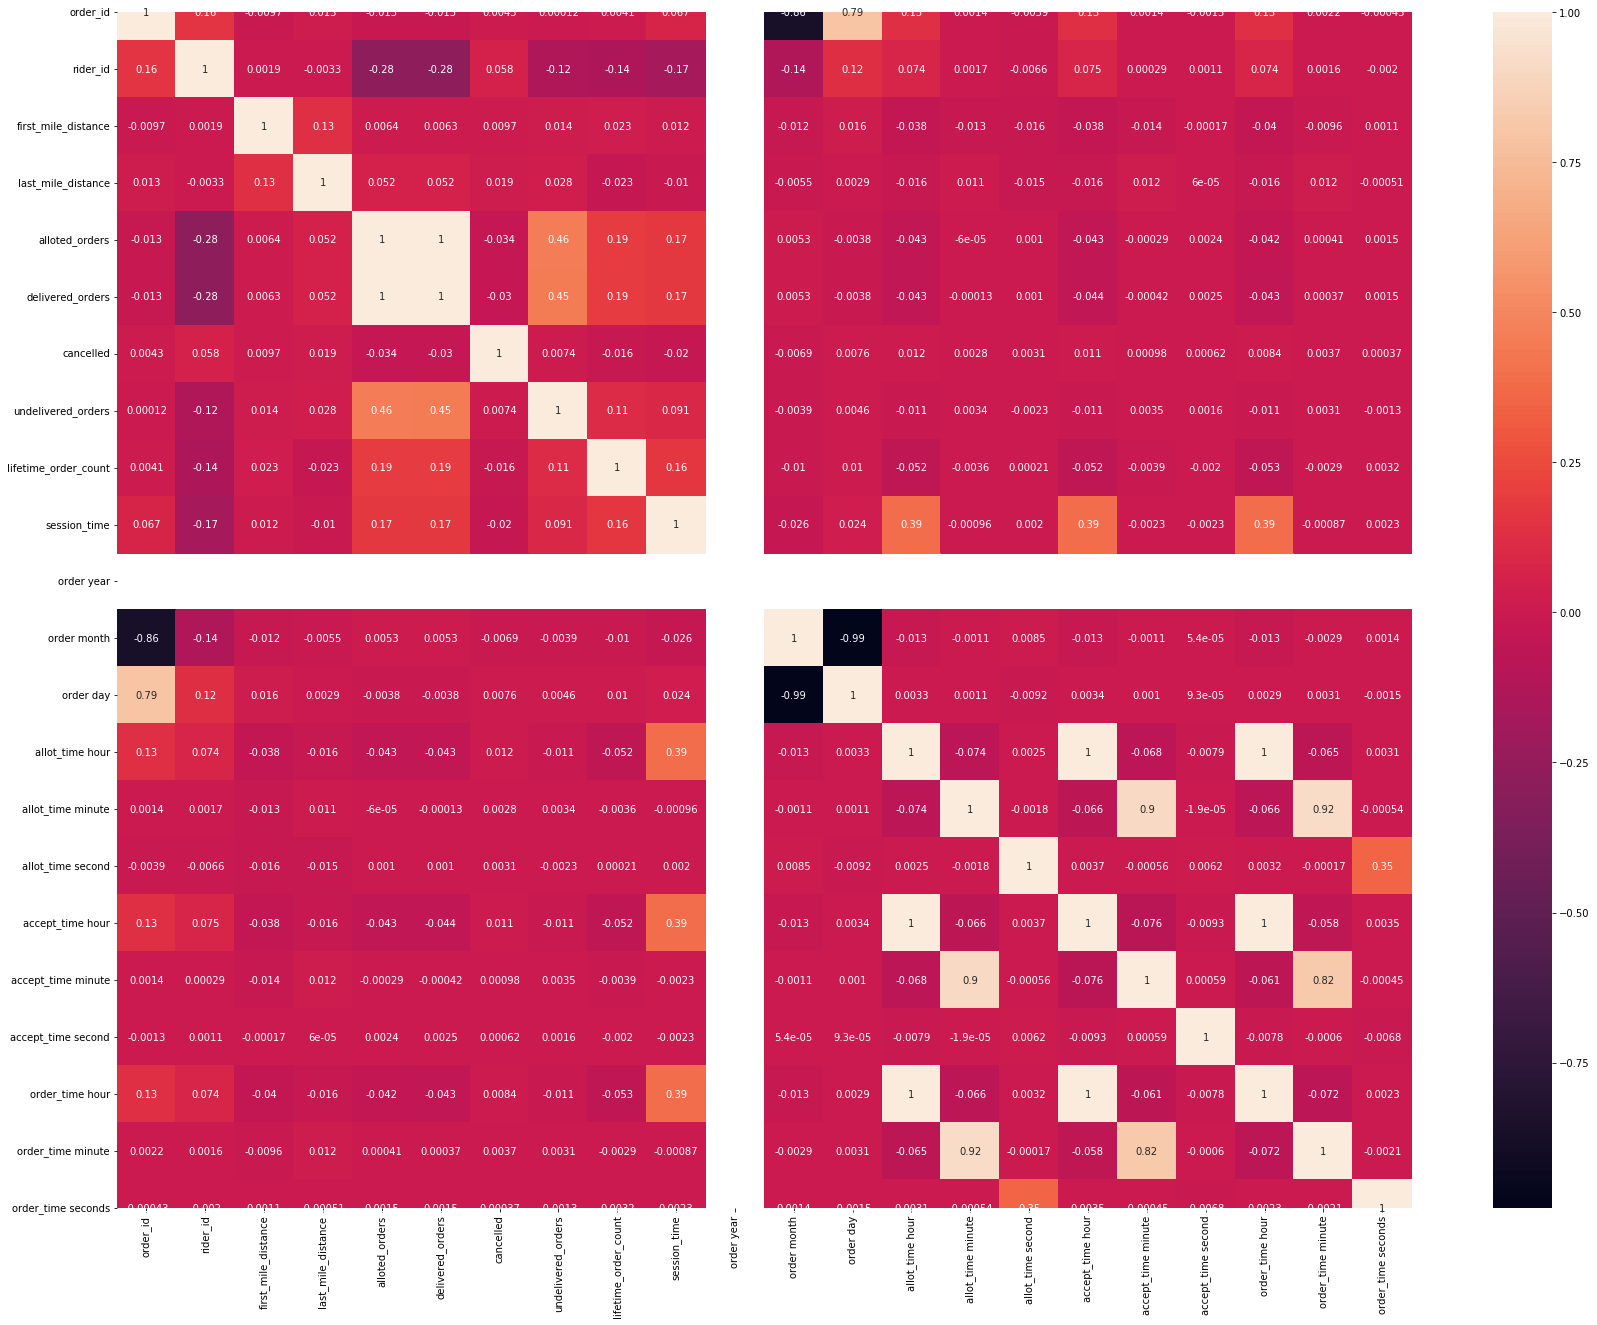

In [31]:
#heatmap is to identify the highly correlated features
plt.figure(figsize=(29,22)) 
sns.heatmap(train.corr(),annot=True)
plt.show()

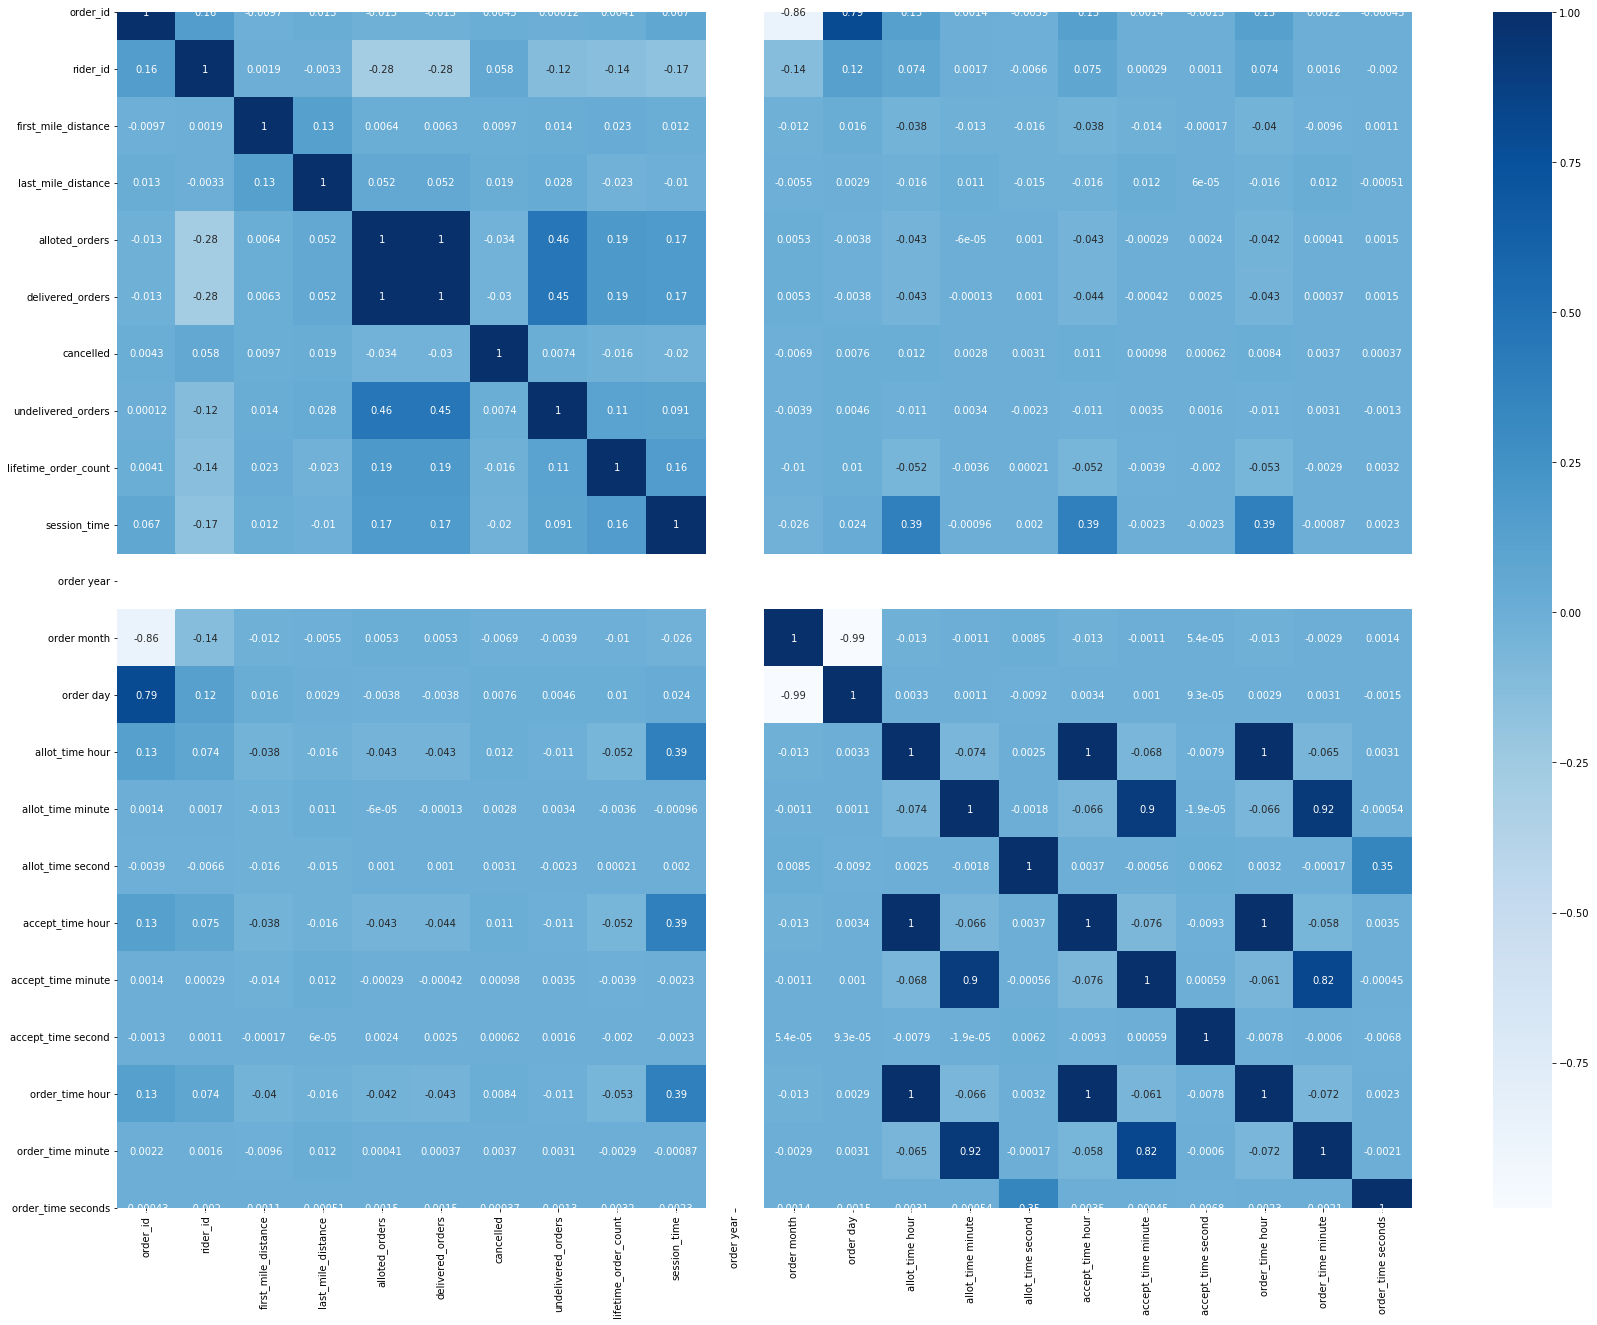

In [32]:
plt.figure(figsize=(29,22)) 
sns.heatmap(train.corr(), cmap='Blues',annot=True)

In [33]:
train.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'session_time', 'order year', 'order month',
       'order day', 'allot_time hour', 'allot_time minute',
       'allot_time second', 'accept_time hour', 'accept_time minute',
       'accept_time second', 'order_time hour', 'order_time minute',
       'order_time seconds'],
      dtype='object')

In [34]:
train.drop(['order year'],axis=1,inplace=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              450000 non-null  int64  
 1   rider_id              450000 non-null  int64  
 2   first_mile_distance   450000 non-null  float64
 3   last_mile_distance    450000 non-null  float64
 4   alloted_orders        433052 non-null  float64
 5   delivered_orders      432659 non-null  float64
 6   cancelled             450000 non-null  int64  
 7   undelivered_orders    432659 non-null  float64
 8   lifetime_order_count  449947 non-null  float64
 9   session_time          446325 non-null  float64
 10  order month           450000 non-null  int64  
 11  order day             450000 non-null  int64  
 12  allot_time hour       450000 non-null  int64  
 13  allot_time minute     450000 non-null  int64  
 14  allot_time second     450000 non-null  int64  
 15  

In [36]:
train.fillna(0,inplace=True)

In [37]:
train.isnull().sum()

order_id                0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
cancelled               0
undelivered_orders      0
lifetime_order_count    0
session_time            0
order month             0
order day               0
allot_time hour         0
allot_time minute       0
allot_time second       0
accept_time hour        0
accept_time minute      0
accept_time second      0
order_time hour         0
order_time minute       0
order_time seconds      0
dtype: int64

In [38]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [39]:
df = train.drop(['cancelled'],axis=1)

In [40]:
corr_features = correlation(df, 0.25)
len(set(corr_features))

11

In [41]:
corr_features

{'accept_time hour',
 'accept_time minute',
 'allot_time hour',
 'alloted_orders',
 'delivered_orders',
 'order day',
 'order month',
 'order_time hour',
 'order_time minute',
 'order_time seconds',
 'undelivered_orders'}

In [45]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train.drop(['cancelled'],axis=1),train['cancelled']
                                               ,test_size=0.3,random_state=100)

In [46]:
test_X.head()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,order month,order day,allot_time hour,allot_time minute,allot_time second,accept_time hour,accept_time minute,accept_time second,order_time hour,order_time minute,order_time seconds
28650,585403,19966,0.199445,3.61,8.0,8.0,0.0,50.0,311.483333,1,26,16,1,29,16.0,2.0,9.0,16,1,22
327521,251625,13526,1.349100,1.10,57.0,56.0,1.0,3560.0,1.300000,2,3,13,31,48,13.0,32.0,0.0,13,31,18
401211,162158,11341,0.160885,0.08,309.0,307.0,2.0,377.0,152.666667,2,5,8,4,27,8.0,5.0,51.0,8,4,22
166467,405531,11730,0.048773,1.69,43.0,43.0,0.0,122.0,178.933333,1,30,8,29,2,8.0,29.0,12.0,8,28,56
162899,401963,11329,0.077787,4.31,88.0,87.0,1.0,1118.0,118.183333,1,30,7,29,16,7.0,29.0,21.0,7,28,11


In [47]:
train_X.head()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,order month,order day,allot_time hour,allot_time minute,allot_time second,accept_time hour,accept_time minute,accept_time second,order_time hour,order_time minute,order_time seconds
204670,366891,1303,0.9016,5.44,133.0,132.0,1.0,236.0,191.083333,1,31,8,41,5,8.0,41.0,11.0,8,41,5
181571,420634,10877,2.1766,5.22,51.0,51.0,0.0,636.0,494.583333,1,30,14,40,51,14.0,44.0,28.0,14,40,36
60858,540506,7136,2.9924,3.73,118.0,118.0,0.0,260.0,253.733333,1,27,15,7,18,15.0,7.0,39.0,15,7,4
311561,317986,117,0.9544,4.21,56.0,55.0,1.0,4163.0,626.966667,2,2,17,22,26,17.0,24.0,2.0,17,21,21
436865,197811,8424,1.0896,1.28,3.0,3.0,0.0,24933.0,103.116667,2,5,17,44,25,17.0,44.0,33.0,17,43,25


#### Method 2 - Chi square test

In [48]:
from sklearn.feature_selection import chi2
f_p_values=chi2(train_X,train_y)

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=T

In [49]:
f_p_values

(array([1.97058862e+05, 4.38073084e+06, 1.99660792e+01, 1.41893344e+02,
        4.70605382e+04, 4.75161732e+04, 4.74101894e+00, 2.16946669e+05,
        2.23853236e+04, 2.52697235e+00, 1.80782018e+02, 4.18849662e+01,
        4.34350439e+01, 4.77399198e+01, 2.32089122e-01, 4.87448499e+01,
        1.46846424e+01, 2.17306391e+01, 6.01644906e+01, 1.12012421e+00]),
 array([0.00000000e+00, 0.00000000e+00, 7.88282456e-06, 1.02612962e-32,
        0.00000000e+00, 0.00000000e+00, 2.94516227e-02, 0.00000000e+00,
        0.00000000e+00, 1.11914768e-01, 3.27096679e-41, 9.68040751e-11,
        4.38268575e-11, 4.86680161e-12, 6.29979084e-01, 2.91523060e-12,
        1.27077529e-04, 3.13740184e-06, 8.72521732e-15, 2.89891709e-01]))

In [50]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=train_X.columns
p_values

order_id                0.000000e+00
rider_id                0.000000e+00
first_mile_distance     7.882825e-06
last_mile_distance      1.026130e-32
alloted_orders          0.000000e+00
delivered_orders        0.000000e+00
undelivered_orders      2.945162e-02
lifetime_order_count    0.000000e+00
session_time            0.000000e+00
order month             1.119148e-01
order day               3.270967e-41
allot_time hour         9.680408e-11
allot_time minute       4.382686e-11
allot_time second       4.866802e-12
accept_time hour        6.299791e-01
accept_time minute      2.915231e-12
accept_time second      1.270775e-04
order_time hour         3.137402e-06
order_time minute       8.725217e-15
order_time seconds      2.898917e-01
dtype: float64

In [51]:
p_values.sort_index(ascending=False)

undelivered_orders      2.945162e-02
session_time            0.000000e+00
rider_id                0.000000e+00
order_time seconds      2.898917e-01
order_time minute       8.725217e-15
order_time hour         3.137402e-06
order_id                0.000000e+00
order month             1.119148e-01
order day               3.270967e-41
lifetime_order_count    0.000000e+00
last_mile_distance      1.026130e-32
first_mile_distance     7.882825e-06
delivered_orders        0.000000e+00
alloted_orders          0.000000e+00
allot_time second       4.866802e-12
allot_time minute       4.382686e-11
allot_time hour         9.680408e-11
accept_time second      1.270775e-04
accept_time minute      2.915231e-12
accept_time hour        6.299791e-01
dtype: float64

#### Method 3 - Lasso Regression

In [53]:
from sklearn.linear_model import Lasso
names = train.drop(['cancelled'],axis=1).columns
names

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'session_time', 'order month', 'order day',
       'allot_time hour', 'allot_time minute', 'allot_time second',
       'accept_time hour', 'accept_time minute', 'accept_time second',
       'order_time hour', 'order_time minute', 'order_time seconds'],
      dtype='object')

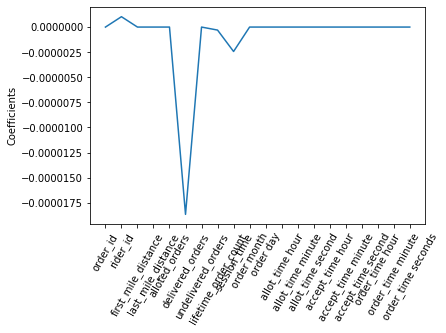

In [54]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(train_X,train_y).coef_
_=plt.plot(range(len(names)),lasso_coef)
_=plt.xticks(range(len(names)),names,rotation=60)
_=plt.ylabel("Coefficients")
plt.show()

In [55]:
len(lasso_coef)

20

In [56]:
import pandas as pd
x =pd.Series(lasso_coef)
x.index=train_X.columns
x

order_id               -3.876582e-09
rider_id                1.031803e-06
first_mile_distance     0.000000e+00
last_mile_distance      0.000000e+00
alloted_orders         -0.000000e+00
delivered_orders       -1.865041e-05
undelivered_orders      0.000000e+00
lifetime_order_count   -3.008401e-07
session_time           -2.432328e-06
order month            -0.000000e+00
order day               0.000000e+00
allot_time hour         0.000000e+00
allot_time minute       0.000000e+00
allot_time second       0.000000e+00
accept_time hour       -0.000000e+00
accept_time minute     -0.000000e+00
accept_time second     -0.000000e+00
order_time hour         0.000000e+00
order_time minute       0.000000e+00
order_time seconds      0.000000e+00
dtype: float64

In [57]:
x.sort_index(ascending=False)

undelivered_orders      0.000000e+00
session_time           -2.432328e-06
rider_id                1.031803e-06
order_time seconds      0.000000e+00
order_time minute       0.000000e+00
order_time hour         0.000000e+00
order_id               -3.876582e-09
order month            -0.000000e+00
order day               0.000000e+00
lifetime_order_count   -3.008401e-07
last_mile_distance      0.000000e+00
first_mile_distance     0.000000e+00
delivered_orders       -1.865041e-05
alloted_orders         -0.000000e+00
allot_time second       0.000000e+00
allot_time minute       0.000000e+00
allot_time hour         0.000000e+00
accept_time second     -0.000000e+00
accept_time minute     -0.000000e+00
accept_time hour       -0.000000e+00
dtype: float64

In [58]:
train['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [59]:
# drop unwanted features
train.drop(['alloted_orders'],axis=1,inplace=True)

In [60]:
# test['allot_time diff'] = (test['allot_time']-test['order_time']).dt.total_seconds()/3600
# test['accept_time diff'] = (test['accept_time']-test['order_time']).dt.total_seconds()/3600
# # test['pickup_time diff'] = (test['pickup_time']-test['order_time']).dt.total_seconds()/3600
# # test['delivered_time diff'] = (test['delivered_time']-test['order_time']).dt.total_seconds()/3600


#### Model Building

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train.drop(['cancelled'],axis=1),train['cancelled']
                                               ,test_size=0.3,random_state=98)

#### logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [173]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
prediction1=model1.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,y_test))

The accuracy of the Logistic Regression is 0.9881111111111112


C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [174]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))

The accuracy of the Logistic Regression is 0.9881111111111112


In [175]:
# Precision --> more false positives
print('The precission score of the logistic regression is',precision_score(y_test, prediction1))

The precission score of the DecisionTreeClassifier is 0.0


In [170]:
# Recall
print('The Recall score of the logistic regression is',recall_score(y_test, prediction1))
# recall_score(y_test, prediction4)

The Recall score of the Random Forest Classifier is 0.0


In [171]:
# F1-score
print('The F1-score score of the logistic regression is',f1_score(y_test, prediction1))
# f1_score(y_test, y_predicted)

The F1-score score of the Random Forest Classifier is 0.0


In [172]:
# F-beta-score
print('The F-beta-score score of the Random Forest Classifier is',fbeta_score(y_test, prediction1,beta=10))
# fbeta_score(y_test, y_predicted,beta=10)

The F-beta-score score of the Random Forest Classifier is 0.0


#### KNeighbors Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
model2=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model2.fit(X_train,y_train)
prediction2=model2.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction2,y_test))

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


The accuracy of the KNN is 0.9873925925925926


In [165]:
# Precision --> more false positives
print('The precission score of the KNeighbors Classifier is',precision_score(y_test, prediction2))

The precission score of the DecisionTreeClassifier is 0.09917355371900827


In [166]:
# Recall
print('The Recall score of the KNeighbors Classifierr is',recall_score(y_test, prediction2))
# recall_score(y_test, prediction4)

The Recall score of the Random Forest Classifier is 0.007476635514018692


In [167]:
# F1-score
print('The F1-score score of the KNeighbors Classifier is',f1_score(y_test, prediction2))
# f1_score(y_test, y_predicted)

The F1-score score of the Random Forest Classifier is 0.013904982618771726


In [168]:
# F-beta-score
print('The F-beta-score score of the KNeighbors Classifier is',fbeta_score(y_test, prediction2,beta=10))
# fbeta_score(y_test, y_predicted,beta=10)

The F-beta-score score of the Random Forest Classifier is 0.007545713200640015


#### Decision tree

In [67]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( X_train, y_train )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to re

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   40.9s finished
C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you m

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
            

In [69]:
tree.best_score_

0.9888222222222223

In [70]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
tree.best_params_

{'max_depth': 7, 'max_features': 4}

In [106]:
clf_tree = DecisionTreeClassifier( max_depth = 7, max_features=4)
clf_tree.fit( X_train, y_train )

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [107]:
prediction3 = clf_tree.predict(X_test)
print('The accuracy of the DecisionTreeClassifier is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the DecisionTreeClassifier is 0.9885703703703703


In [161]:
# Precision --> more false positives
print('The precission score of the DecisionTreeClassifier is',precision_score(y_test, prediction3))

The precission score of the DecisionTreeClassifier is 0.7818181818181819


In [162]:
# Recall
print('The Recall score of the Random Forest Classifier is',recall_score(y_test, prediction3))
# recall_score(y_test, prediction4)

The Recall score of the Random Forest Classifier is 0.05358255451713396


In [163]:
# F1-score
print('The F1-score score of the Random Forest Classifier is',f1_score(y_test, prediction3))
# f1_score(y_test, y_predicted)

The F1-score score of the Random Forest Classifier is 0.10029154518950437


In [164]:
# F-beta-score
print('The F-beta-score score of the Random Forest Classifier is',fbeta_score(y_test, prediction3,beta=10))
# fbeta_score(y_test, y_predicted,beta=10)

The F-beta-score score of the Random Forest Classifier is 0.05408131498661353


#### Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predi

In [109]:
rand_clf = RandomForestClassifier(random_state=6)

In [110]:
rand_clf.fit( X_train, y_train)

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [111]:
rand_clf.score( X_test, y_test)

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.9886444444444444

In [112]:
prediction4=rand_clf.predict(X_test)
print('The accuracy of the Random Forest Classifier is',metrics.accuracy_score(prediction4,y_test))

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


The accuracy of the Random Forest Classifier is 0.9886444444444444


In [153]:
print('The accuracy of the Random Forest Classifier is',metrics.accuracy_score(y_test,prediction4))

The accuracy of the Random Forest Classifier is 0.9886444444444444


In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score


Precision can be seen as a measure of quality, and recall as a measure of quantity. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

In [156]:
# Precision --> more false positives
print('The precission score of the Random Forest Classifier is',precision_score(y_test, prediction4))

The precission score of the Random Forest Classifier is 0.7950819672131147


In [157]:
# Recall
print('The Recall score of the Random Forest Classifier is',recall_score(y_test, prediction4))
# recall_score(y_test, prediction4)

0.06043613707165109

In [159]:
# F1-score
print('The F1-score score of the Random Forest Classifier is',f1_score(y_test, prediction4))
# f1_score(y_test, y_predicted)

The F1-score score of the Random Forest Classifier is 0.11233352634626519


In [160]:
# F-beta-score
print('The F-beta-score score of the Random Forest Classifier is',fbeta_score(y_test, prediction4,beta=10))
# fbeta_score(y_test, y_predicted,beta=10)

The F-beta-score score of the Random Forest Classifier is 0.06099413529902503


#### linear regression

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [185]:
# accuracy score
print('The accuracy of the linear Regression is',metrics.accuracy_score(predictions,y_test))

The accuracy of the linear Regression is 0.9881111111111112


In [186]:
# Precision --> more false positives
print('The precission score of the linear Regression is',precision_score(y_test, predictions))

The precission score of the linear Regression is 0.0


In [187]:
# Recall
print('The Recall score of the linear Regression is',recall_score(y_test, predictions))
# recall_score(y_test, prediction4)

The Recall score of the linear Regression is 0.0


In [188]:
# F1-score
print('The F1-score score of the linear Regression is',f1_score(y_test, predictions))
# f1_score(y_test, y_predicted)

The F1-score score of the linear Regression is 0.0


In [189]:
# F-beta-score
print('The F-beta-score score of the linear Regression is',fbeta_score(y_test, predictions,beta=10))
# fbeta_score(y_test, y_predicted,beta=10)

The F-beta-score score of the linear Regression is 0.0


#### Test data

In [113]:
test = pd.read_csv(r'test.csv/test.csv')

In [114]:
test.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333


In [115]:
test.shape

(144844, 16)

In [116]:
test.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time'],
      dtype='object')

In [117]:
test.drop(['reassignment_method','reassignment_reason','reassigned_order','alloted_orders'],axis=1,inplace=True)

In [118]:
test['order_time'] = pd.to_datetime(test['order_time'])
test['order_date'] = pd.to_datetime(test['order_date'])
test['allot_time'] = pd.to_datetime(test['allot_time'])
test['accept_time'] = pd.to_datetime(test['accept_time'])

In [119]:
# order date

test['order month'] = test['order_date'].dt.month
test['order day'] = test['order_date'].dt.day

In [120]:
# order time
test['order_time hour'] = test['order_time'].dt.hour
test['order_time minute'] = test['order_time'].dt.minute
test['order_time seconds'] = test['order_time'].dt.second

In [121]:
# allot time
test['allot_time hour'] = test['allot_time'].dt.hour
test['allot_time minute'] = test['allot_time'].dt.minute
test['allot_time second'] = test['allot_time'].dt.second

In [122]:
# accept time
test['accept_time hour'] = test['accept_time'].dt.hour
test['accept_time minute'] = test['accept_time'].dt.minute
test['accept_time second'] = test['accept_time'].dt.second

In [123]:
test.drop(['order_time','order_date','allot_time','accept_time'],axis=1,inplace = True)

Cleaning test data

In [126]:
test.isnull().sum()

order_id                   0
rider_id                   0
first_mile_distance        0
last_mile_distance         0
delivered_orders        4884
undelivered_orders      4884
lifetime_order_count     778
session_time            5054
order month                0
order day                  0
order_time hour            0
order_time minute          0
order_time seconds         0
allot_time hour            0
allot_time minute          0
allot_time second          0
accept_time hour          68
accept_time minute        68
accept_time second        68
dtype: int64

In [127]:
test['delivered_orders'].nunique()

465

In [128]:
test['undelivered_orders'].nunique()

11

In [129]:
test['undelivered_orders'].value_counts()

0.0     72835
1.0     39879
2.0     16702
3.0      6468
4.0      2611
5.0       947
6.0       256
7.0       119
8.0       117
10.0       20
9.0         6
Name: undelivered_orders, dtype: int64

In [130]:
test['undelivered_orders'].fillna(0.0,inplace = True)

In [131]:
test['lifetime_order_count'].nunique()

2650

In [132]:
test['session_time'].nunique()

47015

In [133]:
test['accept_time hour'].nunique()

20

In [134]:
test.fillna(0,inplace=True)

In [135]:
test.isnull().sum()

order_id                0
rider_id                0
first_mile_distance     0
last_mile_distance      0
delivered_orders        0
undelivered_orders      0
lifetime_order_count    0
session_time            0
order month             0
order day               0
order_time hour         0
order_time minute       0
order_time seconds      0
allot_time hour         0
allot_time minute       0
allot_time second       0
accept_time hour        0
accept_time minute      0
accept_time second      0
dtype: int64

In [136]:
# prediction5 =model1.predict(X_test)
prediction5 = clf_tree.predict(test)

C:\Users\ARCHANA\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [137]:
final_prediction = pd.DataFrame(prediction5)
final_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       144844 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [138]:
final_prediction

,0
0,0
1,0
2,0
3,0
4,0
...,...
144839,0
144840,0
144841,0
144842,0


In [140]:
final_prediction = final_prediction.rename(columns={0:"Cancelled"})
final_prediction.head(10)

,Cancelled
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [141]:
final_prediction.value_counts()

Cancelled
0            143792
1              1052
dtype: int64

In [142]:
final_prediction.to_csv("PredictedModel.csv")

In [143]:
Data = pd.DataFrame(test['order_id'])

In [145]:
Data['cancelled'] = final_prediction['Cancelled']

In [146]:
Data

,order_id,cancelled
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,0
144840,41185,0
144841,41186,0
144842,41187,0


In [147]:
Data.set_index("order_id", inplace = True)

In [148]:
Data

,cancelled
order_id,
130231,0
130232,0
130233,0
130234,0
130235,0
...,...
41184,0
41185,0
41186,0


In [151]:
Data.value_counts()

cancelled
0            143792
1              1052
dtype: int64

In [150]:
Data.to_csv("Rider-Driven-Cancellation-Prediction.csv")